In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [2]:
df=pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")

In [3]:
df.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
113126,113126,France,A very light yellow-plum fruitiness colors nos...,NaN,88,17.0,Alsace,Alsace,NaN,Anne Krebiehl MW,@AnneInVino,Domaine Charles Baur 2014 Pinot Blanc (Alsace),Pinot Blanc,Domaine Charles Baur
26917,26917,US,"This feels thin and common, with notes of tang...",NaN,82,16.0,California,Sonoma County,Sonoma,NaN,NaN,Vaquero 2010 Chardonnay (Sonoma County),Chardonnay,Vaquero
128402,128402,France,"This soft, rounded wine has gentle ripe fruit ...",NaN,84,20.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Henri Schoenheitz 2012 Pinot Gris (Alsace),Pinot Gris,Henri Schoenheitz
39326,39326,US,"Decadent in coconut flake and vanilla, this is...",Beckstoffer Dr. Crane Vineyard,94,175.0,California,St. Helena,Napa,Virginie Boone,@vboone,Paul Hobbs 2011 Beckstoffer Dr. Crane Vineyard...,Cabernet Sauvignon,Paul Hobbs
28729,28729,US,"Rosé should be dry, delicate and crisp in acid...",NaN,84,20.0,California,Happy Canyon of Santa Barbara,Central Coast,NaN,NaN,Dragonette 2012 Rosé (Happy Canyon of Santa Ba...,Rosé,Dragonette


In [4]:
data=df.copy()

In [5]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
data.describe(include="all")

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,NaN,43,119955,37979,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop extra columns

In [7]:
df=df.drop(columns=["Unnamed: 0","country","designation","province","region_1","region_2","taster_name","taster_twitter_handle","title","variety","winery","price"],axis=1)

In [8]:
df.shape

(129971, 2)

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
df.head(100)

,description,points
0,"Aromas include tropical fruit, broom, brimston...",87
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87
...,...,...
95,"This is a dense wine, packed with both tannins...",88
96,The wine comes from one of the cru estates fol...,88
97,A wisp of bramble extends a savory tone from n...,88
98,"Forest floor, menthol, espresso, cranberry and...",88


## Check Missing data

In [11]:
Missing=df.isnull().sum()
Missing

description    0
points         0
dtype: int64

#### There is no missing data

# Data Cleaning

### Remove Hashtags

In [12]:
df['description'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

### Remove Mentions

In [13]:
df['description'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

### Remove http links

In [14]:
df['description'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

## Convert all characters to lower case

In [15]:
df['description']=df['description'].str.lower()

## Remove Stopwords

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Remove punctuation

In [17]:
df["description"] = df['description'].str.replace('[^\w\s]','', regex = True)

In [18]:
df.sample(frac=0.2,ignore_index=True,random_state=1,replace=True)

,description,points
0,tropical passionfruit notes manage appear desp...,89
1,wines fresh fragrant fruit comes steely blade ...,88
2,hot mouth sweet finish blackberry coffee spice...,83
3,full fruity wine ripe finely textured also goo...,90
4,tough tannins solid wine also shows dark fruit...,87
...,...,...
25989,juicy strawberry jam dried herb combine forcef...,88
25990,probably small soupçon moscatel blend gives wi...,88
25991,round corpulent style chardonnay nutty rich ba...,88
25992,put time capsule classic example early 20th ce...,87


# EDA

In [19]:
import matplotlib.pyplot as plt

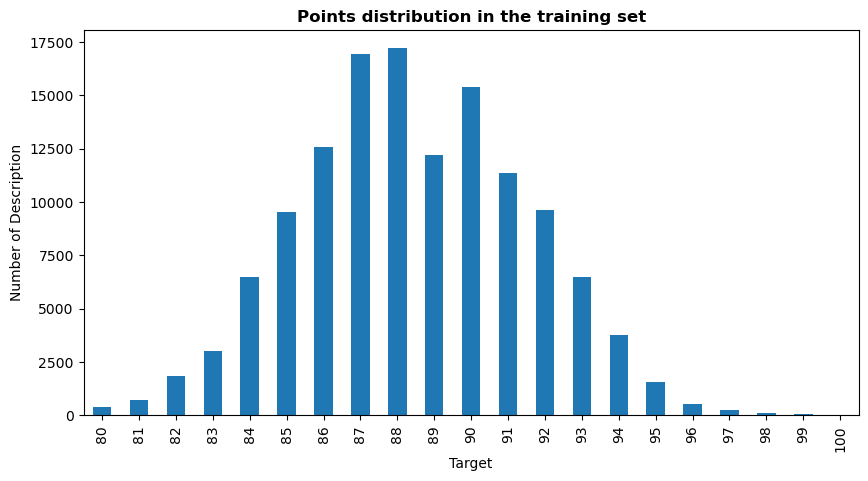

In [20]:
df['points'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Points distribution in the training set',fontweight="bold")
plt.xlabel('Target')
plt.ylabel('Number of Description')
plt.show()


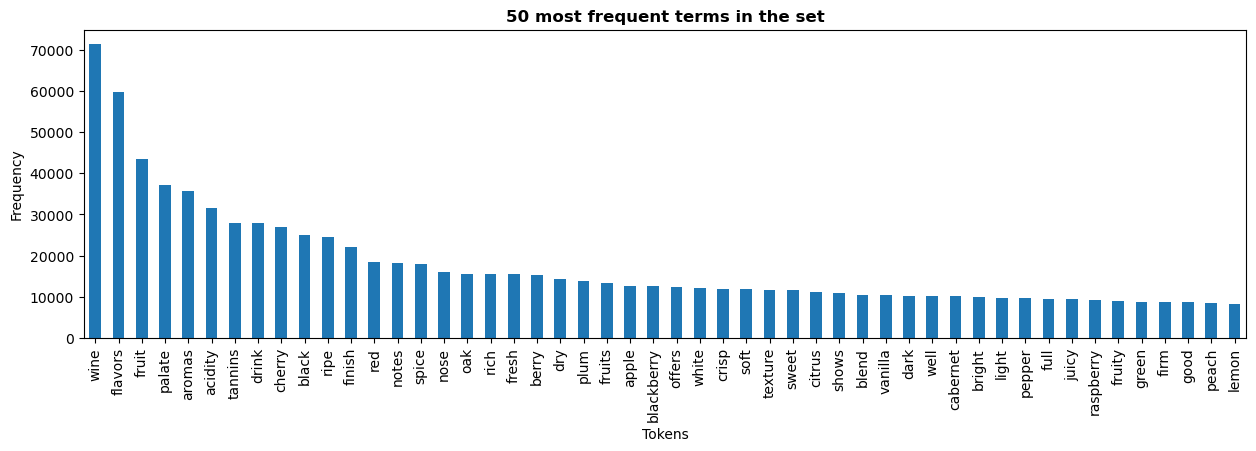

In [21]:
frequent_words = pd.Series(''.join(df['description']).split()).value_counts()[:50]
frequent_words.plot.bar(figsize=(15,4))
plt.title('50 most frequent terms in the set',fontweight="bold")
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

In [22]:
del frequent_words

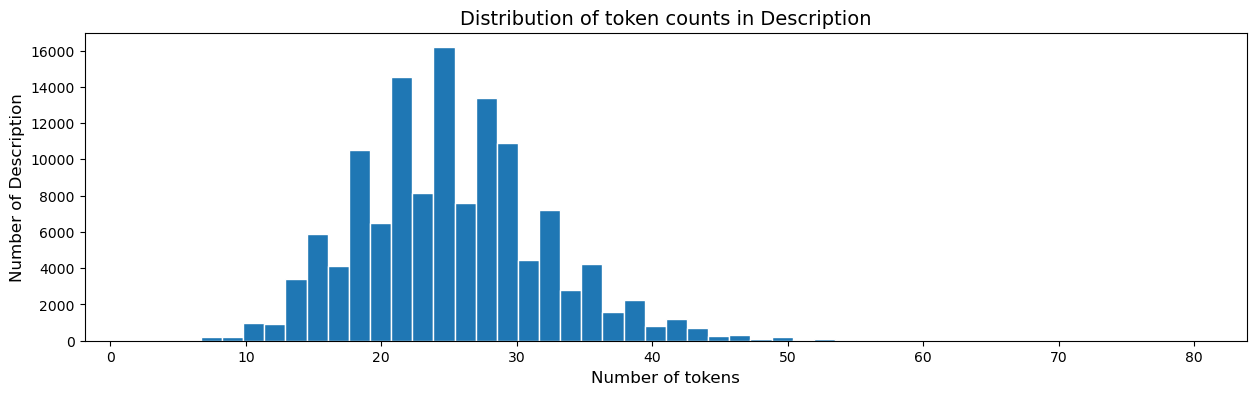

In [23]:
plt.figure(figsize=(15,4))
plt.hist(df['description'].apply(lambda x:len(x.split())),bins=50, edgecolor='white')
plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of Description',fontsize=12)
plt.title('Distribution of token counts in Description', fontsize=14)
plt.show()

In [24]:
less_than_50 = df['description'].apply(lambda x: len(x.split()))< 50 

In [25]:
print(f"{(sum(less_than_50) / len(df) * 100):.2f}% of rows have less than 50 tokens.")


99.71% of rows have less than 50 tokens.


# Split data into train set, validation set and test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df["description"], df["points"],test_size=0.2, random_state=0)

In [28]:
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train,test_size=0.2, random_state=0)

In [29]:
print("Training data:", X_tr.shape, y_tr.shape)
print("Validation data:", X_va.shape, y_va.shape)
print("Test data:", X_test.shape,y_test.shape)


Training data: (83180,) (83180,)
Validation data: (20796,) (20796,)
Test data: (25995,) (25995,)


In [30]:
X_tr.head(10)

40389     pale peach color wine offers bright notes wate...
100418    restrained floral opening jasmine mandarin pee...
107971    mild appealing nose enough citrus convince sau...
3828      awesomely rich black cherries plums licorice m...
121869    rusty color burnt leaf dried earth aromas dryi...
52041     firmly textured appetizingly balanced wine com...
52452     pretty aromas underbrush crushed blue flower p...
22671     aromas white flowers stone fruits lees typical...
16522     layers upon layers spicy saffron peach honey c...
622       mostly syrah dash petite sirah 2 petit verdot ...
Name: description, dtype: object

In [31]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

Number of replicas: 1


In [32]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on CPU
Number of accelerators:  1


### This is for hiding warnings

In [33]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

# Tokenize data

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_tr)
vocab_len=len(tokenizer.word_index)
max_seq_length = 50
X_tr_seq = tokenizer.texts_to_sequences(X_tr)
X_tr_seq = pad_sequences(X_tr_seq, maxlen=max_seq_length,padding='post')
X_va_seq = tokenizer.texts_to_sequences(X_va)
X_va_seq = pad_sequences(X_va_seq, maxlen=max_seq_length,padding='post')
X_te_seq = tokenizer.texts_to_sequences(X_test)
X_te_seq = pad_sequences(X_te_seq, maxlen=max_seq_length,padding='post')

In [36]:
X_tr_seq

array([[  734,    51,   135, ...,     0,     0,     0],
       [  514,   153,   835, ...,     0,     0,     0],
       [  388,   453,    18, ...,     0,     0,     0],
       ...,
       [16136,  1117,   385, ...,     0,     0,     0],
       [ 1174,   532,   288, ...,     0,     0,     0],
       [  107,    22,    20, ...,     0,     0,     0]], dtype=int32)

In [37]:
X_va_seq.shape

(20796, 50)

In [38]:
X_te_seq.shape

(25995, 50)

In [39]:
input_shape = [X_tr_seq.shape[1]]
 
input_shape

[50]

# Apply Neural Networks

## 7 layered NN

In [40]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN, Embedding, Flatten

In [42]:
model = Sequential([
    tf.keras.layers.Embedding(vocab_len,output_dim=2,input_length=50),
    tf.keras.layers.SimpleRNN(units=64, activation='relu',
                         return_sequences=False),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=100)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 2)             75130     
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                4288      
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4

In [43]:
model.compile(optimizer='adam',
                  loss='mae',
                  metrics=['acc']
                 )

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [45]:
losses = model.fit(X_tr_seq, y_tr,
                   validation_data=(X_va_seq, y_va),
                   callbacks=[earlystopping_cb],
                   batch_size=256,
                   epochs=20,  
 
                   )

Epoch 1/20
325/325 [==============================] - 10s 24ms/step - loss: 16.8862 - acc: 0.0048 - val_loss: 2.3692 - val_acc: 0.0000e+00
Epoch 2/20
325/325 [==============================] - 8s 25ms/step - loss: 4.3194 - acc: 0.0065 - val_loss: 10.3616 - val_acc: 0.0035
Epoch 3/20
325/325 [==============================] - 7s 23ms/step - loss: 5.9784 - acc: 0.0136 - val_loss: 1.5364 - val_acc: 0.0000e+00
Epoch 4/20
325/325 [==============================] - 8s 23ms/step - loss: 2.7506 - acc: 0.0088 - val_loss: 5.2597 - val_acc: 0.0000e+00
Epoch 5/20
325/325 [==============================] - 8s 24ms/step - loss: 5.1440 - acc: 0.0064 - val_loss: 1.5433 - val_acc: 0.0477
Epoch 6/20
325/325 [==============================] - 8s 23ms/step - loss: 2.8998 - acc: 0.0066 - val_loss: 1.3662 - val_acc: 0.0000e+00
Epoch 7/20
325/325 [==============================] - 7s 23ms/step - loss: 2.9637 - acc: 0.0053 - val_loss: 2.2251 - val_acc: 0.0000e+00
Epoch 8/20
325/325 [==========================

<Axes: >

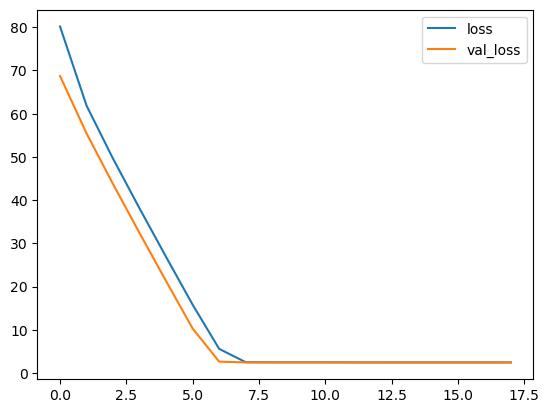

In [107]:
loss_df = pd.DataFrame(losses.history)
 
# history stores the loss/val
# loss in each epoch
 
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()

In [108]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

650/650 [==============================] - 3s 4ms/step - loss: 2.4633 - acc: 0.0000e+00
Validation loss: 2.4633100032806396
Validation accuracy: 0.0


In [110]:
pred=model.predict(X_te_seq)

813/813 [==============================] - 4s 5ms/step


In [112]:
pred[50]

array([88.00072], dtype=float32)

## 9 layered NN

In [96]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=101)
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 64)                16064     
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 dense_83 (Dense)            (None, 64)                4160      
                                                                 
 dense_84 (Dense)            (None, 64)                4160      
                                                                 
 dense_85 (Dense)            (None, 64)                4160      
                                                                 
 dense_86 (Dense)            (None, 64)                4160      
                                                                 
 dense_87 (Dense)            (None, 64)              

In [97]:
model.compile(optimizer='adam',
                  loss='mae',
                  metrics=['acc']
                 )

In [98]:
losses = model.fit(X_tr_seq, y_tr,
 
                   validation_data=(X_va_seq, y_va),
                    callbacks=[earlystopping_cb],
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch
 
                   )

Epoch 1/15
325/325 [==============================] - 4s 6ms/step - loss: 42.8102 - acc: 0.0058 - val_loss: 39.5362 - val_acc: 0.0041
Epoch 2/15
325/325 [==============================] - 2s 6ms/step - loss: 39.1509 - acc: 0.0075 - val_loss: 38.3758 - val_acc: 0.0100
Epoch 3/15
325/325 [==============================] - 2s 6ms/step - loss: 35.4802 - acc: 0.0105 - val_loss: 23.8706 - val_acc: 0.0018
Epoch 4/15
325/325 [==============================] - 2s 6ms/step - loss: 4.8167 - acc: 0.0047 - val_loss: 2.3103 - val_acc: 0.0038
Epoch 5/15
325/325 [==============================] - 2s 6ms/step - loss: 2.3102 - acc: 0.0045 - val_loss: 2.2271 - val_acc: 0.0050
Epoch 6/15
325/325 [==============================] - 2s 7ms/step - loss: 2.2464 - acc: 0.0063 - val_loss: 2.2267 - val_acc: 0.0028
Epoch 7/15
325/325 [==============================] - 2s 6ms/step - loss: 2.1844 - acc: 0.0055 - val_loss: 2.3954 - val_acc: 0.0034
Epoch 8/15
325/325 [==============================] - 2s 6ms/step - lo

<Axes: >

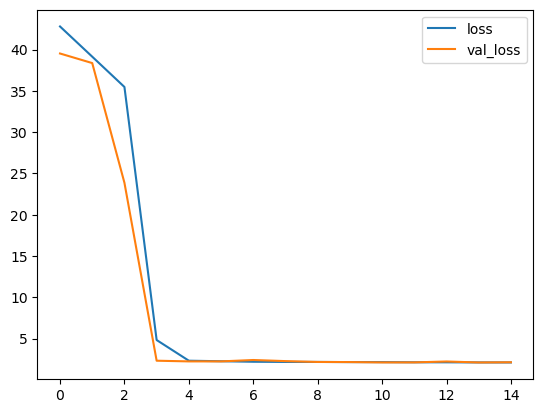

In [99]:
loss_df = pd.DataFrame(losses.history)
 
# history stores the loss/val
# loss in each epoch
 
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()

In [100]:
pred=model.predict(X_te_seq)
pred

813/813 [==============================] - 1s 1ms/step


array([[87.93488 , 87.89814 , 87.865715, ..., 87.86776 , 87.87221 ,
        87.92104 ],
       [88.65356 , 88.76174 , 88.680275, ..., 88.765175, 88.60709 ,
        88.789734],
       [87.98699 , 87.97456 , 87.945305, ..., 88.0692  , 87.99378 ,
        87.98059 ],
       ...,
       [87.815475, 87.86561 , 87.786255, ..., 87.863754, 87.80947 ,
        87.84096 ],
       [90.29428 , 90.368195, 90.33962 , ..., 90.313354, 90.405205,
        90.30465 ],
       [88.41839 , 88.425224, 88.515335, ..., 88.479774, 88.54852 ,
        88.41253 ]], dtype=float32)

In [101]:
y_test

70354     83
4473      91
59653     85
107856    93
64547     88
          ..
81227     86
68363     90
79354     85
15459     93
50912     86
Name: points, Length: 25995, dtype: int64

In [102]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

650/650 [==============================] - 1s 2ms/step - loss: 2.1214 - acc: 0.0090
Validation loss: 2.1214427947998047
Validation accuracy: 0.009040200151503086


## 13 layered NN

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=250))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=101, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate = 1e-4),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc']
                 )

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 128)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 248, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 124, 64)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 124, 128)         66048     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 124, 128)         512       
 ormalization)                                                   
                                                      

In [54]:
from tensorflow.keras.callbacks import EarlyStopping

# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [55]:
history = model.fit(X_tr_seq,
                    y_tr,
                    validation_data=(X_va_seq, y_va),
                    callbacks=[earlystopping_cb],
                    batch_size=32,
                    epochs=2,
                    verbose=1,
                   )

Epoch 1/2
2600/2600 [==============================] - 992s 378ms/step - loss: 3.2395 - acc: 0.1786 - val_loss: 2.3253 - val_acc: 0.2389
Epoch 2/2
2600/2600 [==============================] - 984s 378ms/step - loss: 2.1495 - acc: 0.2524 - val_loss: 1.9836 - val_acc: 0.2680


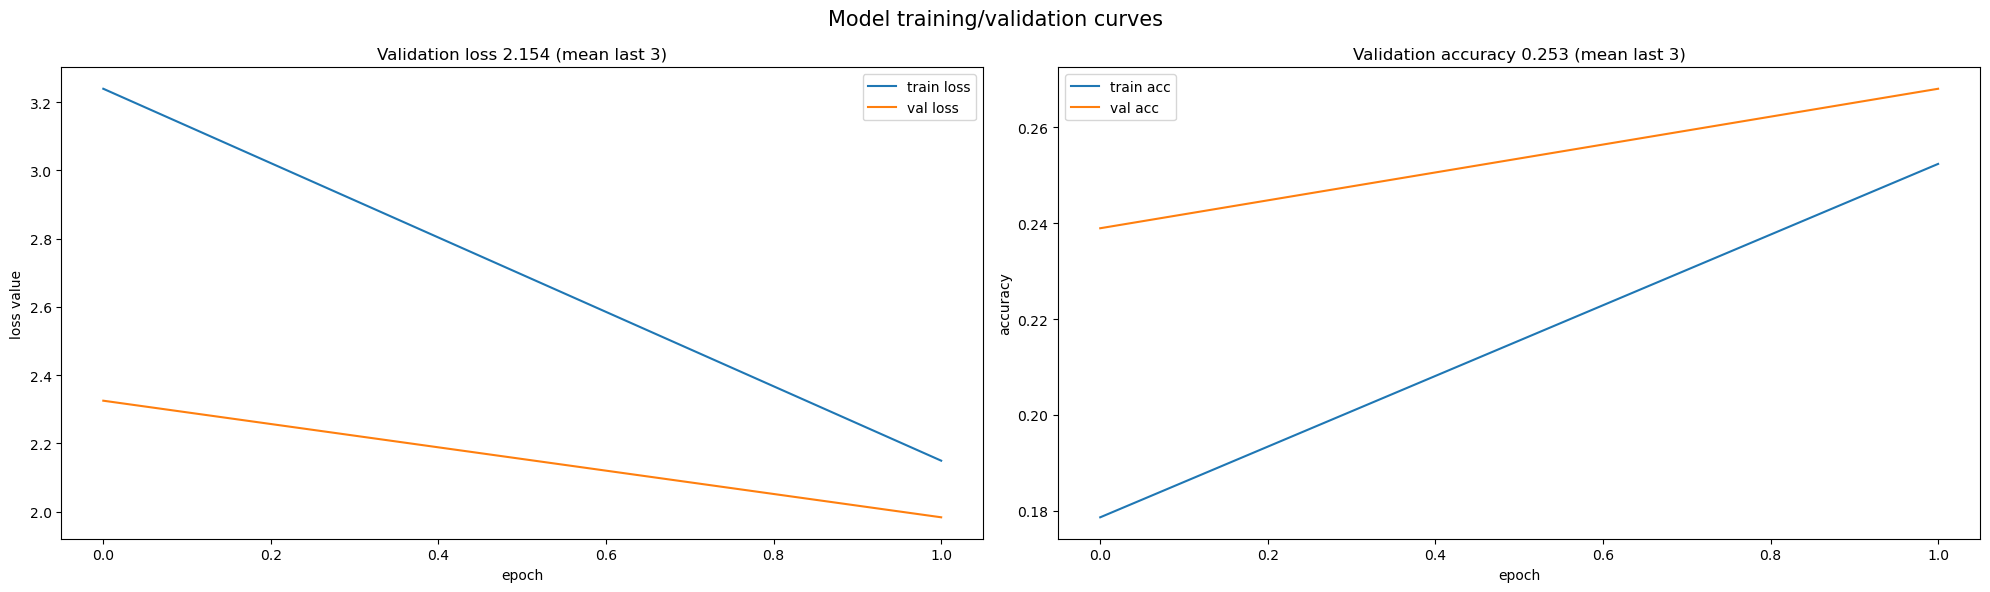

In [56]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

In [57]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

650/650 [==============================] - 65s 100ms/step - loss: 1.9836 - acc: 0.2680
Validation loss: 1.983579158782959
Validation accuracy: 0.2680323123931885


In [58]:
pred = [np.argmax(i) for i in model.predict(X_va_seq)].round().flatten()


650/650 [==============================] - 67s 100ms/step


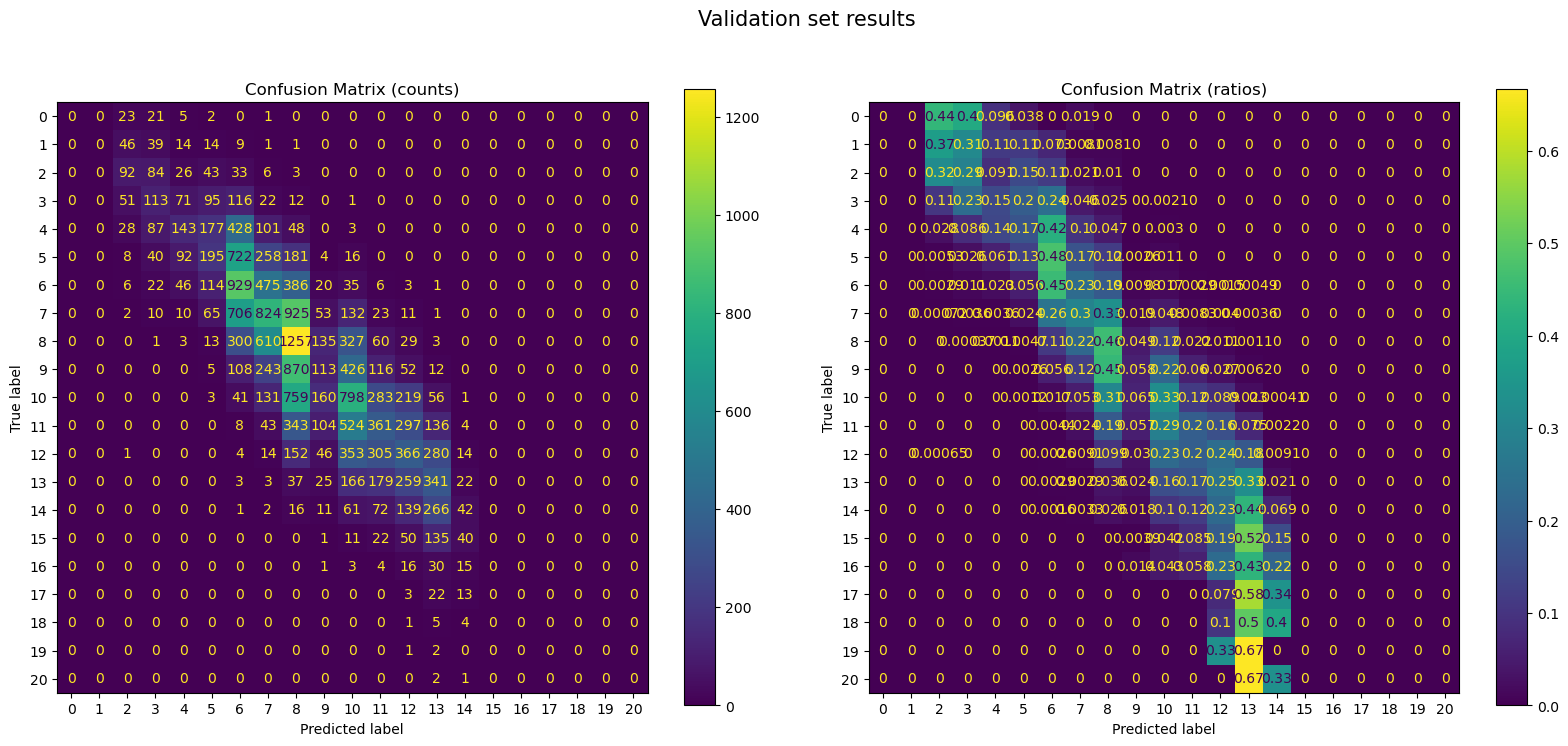

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_labels = pred.round().flatten()
classes = unique_labels(y_va, predicted_labels)
# Compute confusion matrix for raw counts
cm_raw = confusion_matrix(y_va, predicted_labels)

# Compute confusion matrix for normalized ratios
cm_norm = confusion_matrix(y_va, predicted_labels, normalize='true')

# Create confusion matrix plots
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)

# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={"width_ratios": [10, 10], "wspace": 0.1}, subplot_kw={"aspect":"equal"})
plt.suptitle('Validation set results', size = 15)
axs[0].set(xticks=np.arange(cm_raw.shape[1]),
       yticks=np.arange(cm_raw.shape[0]),
       xticklabels=classes, yticklabels=classes,
       ylabel='True Label',
       xlabel='Predicted Label')
disp_raw.plot(ax=axs[0])
axs[0].set_title('Confusion Matrix (counts)')
disp_norm.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix (ratios)')
plt.show()